## Wordnet Similarity

### Part - 1
   
    1. Find the top 5 occuring words(ignoring the stop words) and then find the words most similar to them. Use the extract given below.
    
    2. For any given word visualize how two words are similar

~~~~
The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size. 
~~~~


In [163]:
sample_data = """The Supreme Court ruled last week in the case of Fane Lozman vs the City of Riviera Beach, Florida. They decided that Lozman’s 60-foot, two-story, motorless, rudderless floating home was not a boat or a vessel, and hence should not have been seized under maritime law and destroyed by the city.

With the line between house and boat a little bit clearer, reader Steve asked us to clarify something else: “What defines a boat, versus a ship?”

One of the quickest ways to reveal yourself as a landlubber is to refer to a ship as a boat, but there’s no absolute distinction between the two, and even experienced mariners rely on local custom and usage to differentiate them. 

Back in the Age of Sail, a ship was pretty well defined as a vessel with three or more square rigged masts. As different methods of power generation replaced wind and sail, the ships of old became more specifically known as “sailing ships,” and the usage of ship broadened to cover a wide, ill-defined variety of vessels. 

One thing that sets a ship apart from a boat is size. According the U.S. Naval Institute, a boat, generally speaking, is small enough to be carried aboard a larger vessel, and a vessel large enough to carry a smaller one is a ship. Or, as Steve says his Navy Lieutenant father put it to him, “You can put a boat on a ship, but you can’t put a ship on a boat.”

Now, this Naval convention is a good rule of thumb most of the time, but there are a few exceptions, among both naval and civilian vessels. Some yachts, ferries, tug boats, fishing boats, police boats, etc. can carry small lifeboats or dinghies, but they usually don’t graduate to ship status because of that. On the other hand, a large container ship or the USS Cole can be carried aboard an even bigger ship without getting demoted to a boat. 

The U.S. Navy seems to want to have it both ways with their submarines. One component of each vessel’s official name is USS—that is, United States Ship—but seamen, the Naval Institute says, usually refer to submarines in general as boats, regardless of size."""

In [164]:
from nltk.corpus import stopwords

In [165]:
from nltk.tokenize import RegexpTokenizer, word_tokenize

In [166]:
from nltk import FreqDist

In [167]:
from nltk.stem import WordNetLemmatizer

In [168]:
stop_words = set(stopwords.words('english'))

## Occurences of Words

In [227]:
pattern = RegexpTokenizer(r'\w+')
words = pattern.tokenize(sample_data)

In [228]:
#Remove punctuation
words = [word for word in words if len(word) > 1]

In [229]:
#Remove numbers
#words = [word for word in words if not word.isnumeric()]


In [230]:
lemmatizer = WordNetLemmatizer()

In [231]:
#Lemmatize the words
filtered_words = []
for word in words:
    filtered_words.append(lemmatizer.lemmatize(word.lower()))

In [232]:
#Remove StopWords
words = [word for word in filtered_words if word.lower() not in stop_words]

In [233]:
#find frequency distribution
fdist =  FreqDist(words)

In [234]:
for word, frequency in fdist.most_common(5):
    print(u'{}:{}'.format(word, frequency))

ship:14
boat:13
vessel:7
one:4
naval:4


## Similarity

In [235]:
from nltk.corpus import wordnet

In [236]:
#Findind the synonyms
synonymns = []
for word, frequency in fdist.most_common(5):
    synonymns.append(wordnet.synsets(word))

In [237]:
synonymns

[[Synset('ship.n.01'),
  Synset('transport.v.04'),
  Synset('ship.v.02'),
  Synset('embark.v.01'),
  Synset('ship.v.04'),
  Synset('ship.v.05')],
 [Synset('boat.n.01'), Synset('gravy_boat.n.01'), Synset('boat.v.01')],
 [Synset('vessel.n.01'), Synset('vessel.n.02'), Synset('vessel.n.03')],
 [Synset('one.n.01'),
  Synset('one.n.02'),
  Synset('one.s.01'),
  Synset('one.s.02'),
  Synset('one.s.03'),
  Synset('one.s.04'),
  Synset('one.s.05'),
  Synset('one.s.06'),
  Synset('matchless.s.01')],
 [Synset('naval.a.01')]]

In [238]:
print(syns)

[Synset('naval.a.01')]


In [239]:
print(syns[0].lemmas()[0].name())

naval


In [240]:
for syns in synonymns:
    for item in syns:
        print(item.lemmas()[0].name())

ship
transport
ship
embark
ship
ship
boat
gravy_boat
boat
vessel
vessel
vessel
one
one
one
one
one
one
one
one
matchless
naval


In [241]:
most_common = []
for word, frequency in fdist.most_common(5):
    most_common.append(word)

In [242]:
most_common

['ship', 'boat', 'vessel', 'one', 'naval']

In [243]:
k = wordnet.synsets('fane')

In [244]:
k

[]

In [277]:
sim_dict ={}
for item in most_common:
    item_1 = wordnet.synset(wordnet.synsets(item)[0].name())
    big = 0
    for word in words:
        if(word!=item):
            #print(word)
            word1 = word
            word = wordnet.synsets(word)
            if(len(word)!=0):
                word = wordnet.synset(word[0].name())
                similiar = item_1.wup_similarity(word)
                if(similiar != None and similiar>big):
                    big = similiar
                    sim_word = word1
    sim_dict.update({item:[sim_word, big]})
               #print(item_1.wup_similarity(word))
        

In [278]:
type(similiar)

NoneType

In [279]:
sim_dict

{'boat': ['ferry', 0.9565217391304348],
 'naval': ['two', 0],
 'one': ['two', 0.875],
 'ship': ['boat', 0.9090909090909091],
 'vessel': ['back', 0.7142857142857143]}

## Visualise

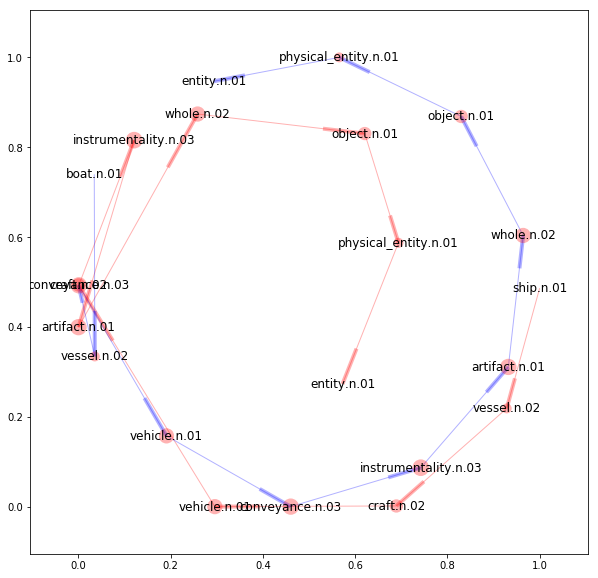

In [290]:
from nltk.corpus import wordnet as wn
import networkx as nx
import matplotlib.pyplot as plt

def closure_graph(synset, fn):
    seen = set()
    graph = nx.DiGraph()

    def recurse(s):
        if not s in seen:
            seen.add(s)
            graph.add_node(s.name())
            for s1 in fn(s):
                graph.add_node(s1.name())
                graph.add_edge(s.name(), s1.name())
                recurse(s1)

    recurse(synset)
    return graph


ship = wn.synsets('ship')[0]
G = closure_graph(ship,
                      lambda s: s.hypernyms())
boat = wn.synsets('boat')[0]
G2 = closure_graph(boat,
                      lambda s: s.hypernyms())
index = nx.betweenness_centrality(G)
index2 = nx.betweenness_centrality(G2)
plt.rc('figure', figsize=(10, 10))
node_size = [index[n]*1000 for n in G]
node_size_2 = [index2[n1]*1000 for n1 in G2]
pos = nx.spring_layout(G)
pos2 = nx.spring_layout(G2)
nx.draw_networkx(G, pos, node_size=node_size, edge_color='r', alpha=.3, linewidths=0)
nx.draw_networkx(G2, pos2, node_size=node_size_2, edge_color='b', alpha=.3, linewidths=0)
plt.show()